In [1]:
#| label: fig1cell
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5)
metrics_dir = Path("../data/ukbb_gcn_scaling/flops")

In [2]:
df_flop = pd.DataFrame()
for p in metrics_dir.glob("*.txt"):
    df = pd.read_csv(p, sep="\t")
    exp = pd.DataFrame(df['name'].str.split('-|_', n=-1, expand=True, regex=True).values.reshape(-1, 2).T)
    exp.columns = exp.iloc[0]
    exp.drop(0, inplace=True)
    exp = exp.reset_index(drop=True)
    df = pd.concat([exp, df], axis=1)
    df_metrics = pd.read_csv(str(p).replace('.txt', '_metrics.tsv'), sep="\t")
    df['test_r2'] = df_metrics.loc[df_metrics['metricName'] == 'test/r2', 'metricValue'].values[0]
    df['cpu_percent_avg'] = df_metrics.loc[df_metrics['metricName'] == 'sys.cpu.percent.avg', 'metricValue'].mean()
    df['cpu_percent_max'] = df_metrics.loc[df_metrics['metricName'] == 'sys.cpu.percent.avg', 'metricValue'].max()
    df['gpu_used_avg'] = df_metrics.loc[df_metrics['metricName'] == 'sys.gpu.0.used_memory', 'metricValue'].mean()
    df['gpu_used_max'] = df_metrics.loc[df_metrics['metricName'] == 'sys.gpu.0.used_memory', 'metricValue'].max()
    df['sys_load_avg'] = df_metrics.loc[df_metrics['metricName'] == 'sys.load.avg', 'metricValue'].mean()
    df['sys_load_max'] = df_metrics.loc[df_metrics['metricName'] == 'sys.load.avg', 'metricValue'].max()
    df['ram_used_avg'] = df_metrics.loc[df_metrics['metricName'] == 'sys.ram.used', 'metricValue'].mean()
    df['ram_used_max'] = df_metrics.loc[df_metrics['metricName'] == 'sys.ram.used', 'metricValue'].max()
    df_flop = pd.concat([df_flop, df])

df_flop.loc[:, ['N', 'W', 'GCL', 'F', 'K', 'FCL','M',]]= df_flop.loc[:, ['N', 'W', 'GCL', 'F', 'K', 'FCL','M',]].astype(int)


<Axes: xlabel='flops', ylabel='test_r2'>

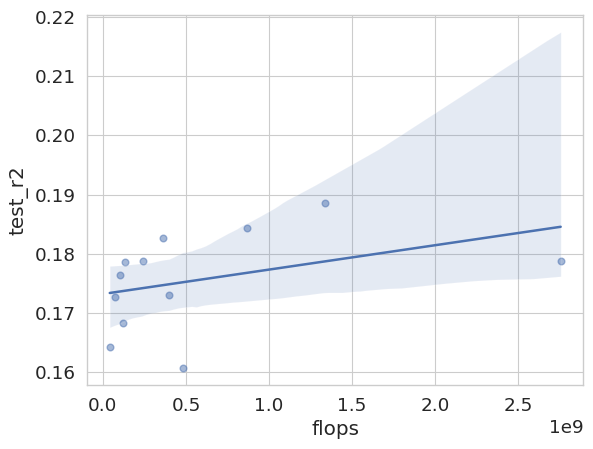

In [3]:
sns.regplot(x='flops', y='test_r2', data=df_flop, scatter_kws={'alpha':0.5})

<Axes: xlabel='F', ylabel='GCL'>

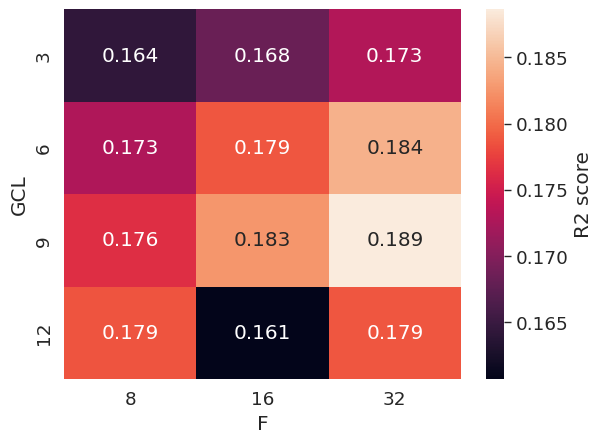

In [11]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'test_r2']].pivot(index='GCL', columns='F', values='test_r2'), annot=True, fmt=".3f", cbar_kws={'label': 'R2 score'})

<Axes: xlabel='F', ylabel='GCL'>

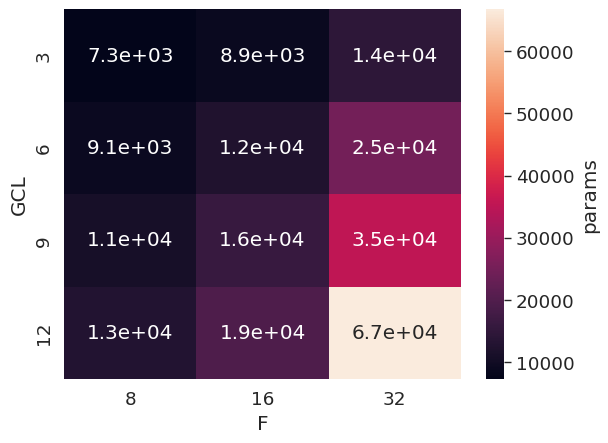

In [12]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'params']].pivot(index='GCL', columns='F', values='params'), annot=True , cbar_kws={'label': 'params'})

<Axes: xlabel='F', ylabel='GCL'>

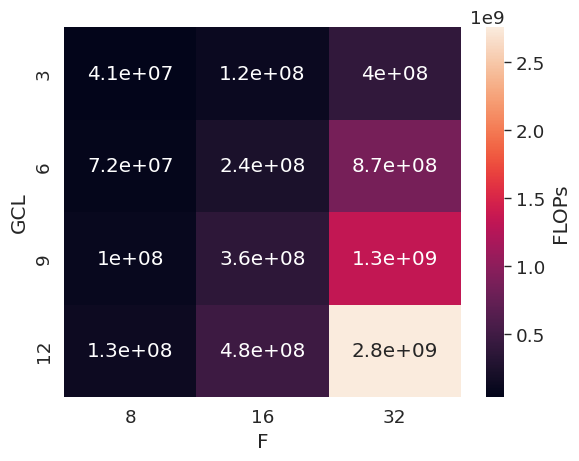

In [13]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'flops']].pivot(index='GCL', columns='F', values='flops'), annot=True , cbar_kws={'label': 'FLOPs'})

<Axes: xlabel='F', ylabel='GCL'>

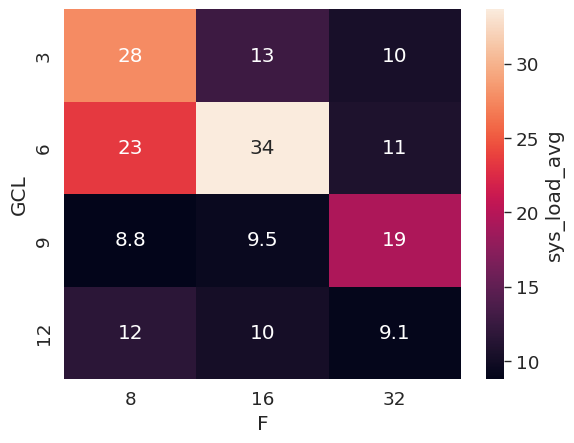

In [20]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'sys_load_avg']].pivot(index='GCL', columns='F', values='sys_load_avg'), annot=True , cbar_kws={'label': 'sys_load_avg'})

<Axes: xlabel='F', ylabel='GCL'>

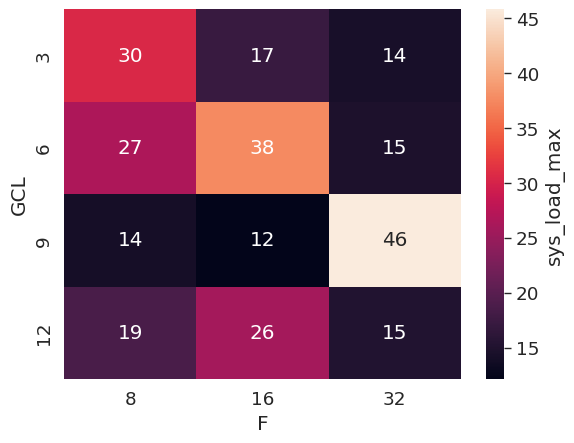

In [21]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'sys_load_max']].pivot(index='GCL', columns='F', values='sys_load_max'), annot=True , cbar_kws={'label': 'sys_load_max'})

<Axes: xlabel='F', ylabel='GCL'>

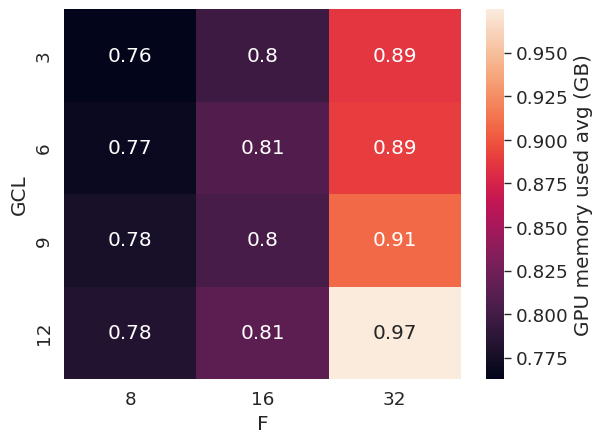

In [19]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'gpu_used_avg']].pivot(index='GCL', columns='F', values='gpu_used_avg') / 1e+9, annot=True , cbar_kws={'label': 'GPU memory used avg (GB)'})

<Axes: xlabel='F', ylabel='GCL'>

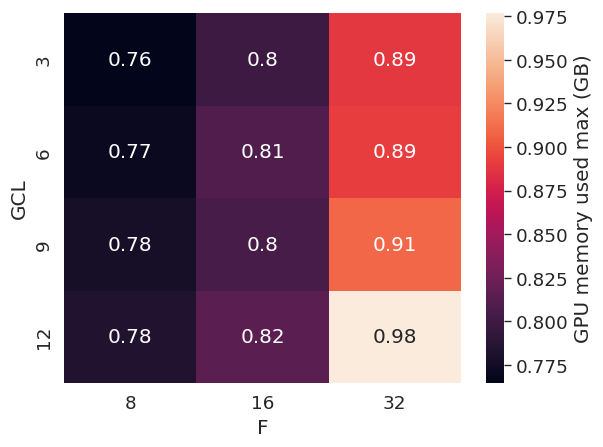

In [20]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'gpu_used_max']].pivot(index='GCL', columns='F', values='gpu_used_max') / 1e+9, annot=True , cbar_kws={'label': 'GPU memory used max (GB)'})

<Axes: xlabel='F', ylabel='GCL'>

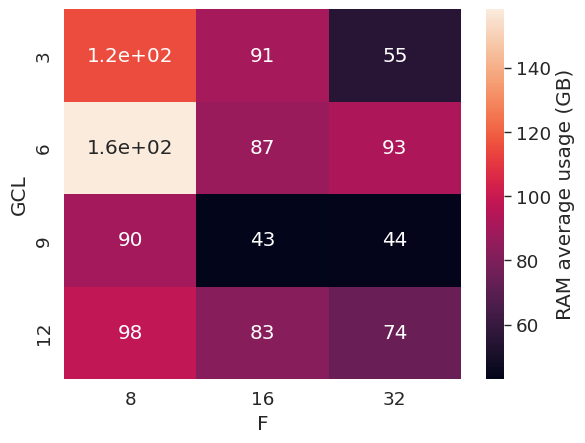

In [12]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'ram_used_avg']].pivot(index='GCL', columns='F', values='ram_used_avg') / 1e+9, annot=True , cbar_kws={'label': 'RAM average usage (GB)'})

<Axes: xlabel='F', ylabel='GCL'>

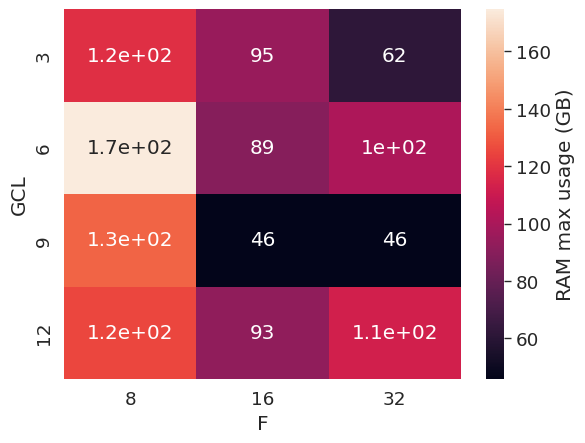

In [13]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'ram_used_max']].pivot(index='GCL', columns='F', values='ram_used_max') / 1e+9, annot=True , cbar_kws={'label': 'RAM max usage (GB)'})

<Axes: xlabel='F', ylabel='GCL'>

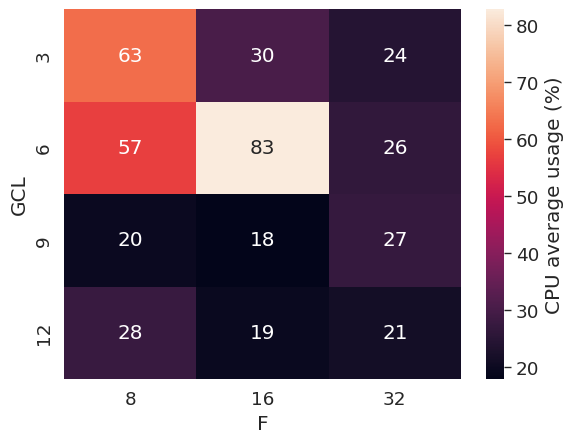

In [14]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'cpu_percent_avg']].pivot(index='GCL', columns='F', values='cpu_percent_avg'), annot=True , cbar_kws={'label': 'CPU average usage (%)'})

<Axes: xlabel='F', ylabel='GCL'>

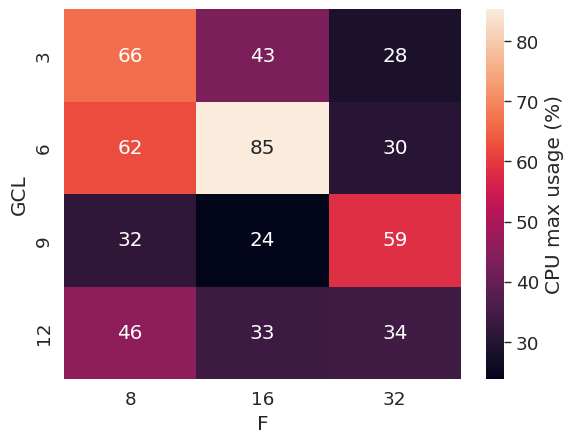

In [15]:
sns.heatmap(df_flop.loc[:, ['GCL', 'F', 'cpu_percent_max']].pivot(index='GCL', columns='F', values='cpu_percent_max'), annot=True , cbar_kws={'label': 'CPU max usage (%)'})